In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import os
import math
import sys

from tifffile import imsave
import scipy.ndimage as ndimage
import scipy.signal as signal
%matplotlib inline
from skimage.draw import line_nd
from skimage.draw import line_aa
from skimage.draw import line
from skimage.draw import bezier_curve
from scipy.interpolate import CubicSpline
import random 
import elasticdeform
import os

In [2]:
ROI_size = 500

In [3]:
def rotate_2d_points_around_center_of_mass(points):
    """
    Rotates a set of 2D points representing an object around its center of mass.

    Parameters:
    points (np.ndarray): A NumPy array of shape (n, 2), where n is the number of points.
    
    Returns:
    np.ndarray: A NumPy array of the rotated points with the same shape as input.
    """
    # Step 1: Calculate the center of mass (centroid)
    center_of_mass = points.mean(axis=0)
    
    # Step 2: Translate points so the center of mass is at the origin
    translated_points = points - center_of_mass
    
    # Step 3: Generate a random angle between 0 and 2*pi radians
    angle = random.uniform(0, 2 * np.pi)
    
    # Step 4: Create the rotation matrix
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    
    # Step 5: Rotate the points
    rotated_translated_points = translated_points @ rotation_matrix.T
    
    # Step 6: Translate the points back to the original center of mass
    rotated_points = rotated_translated_points + center_of_mass
    
    rotated_points = np.clip(rotated_points, 0, ROI_size-1)
    # print (rotated_points.shape)
    # condition = (rotated_points[:, 0] > 0) & (rotated_points[:, 0] < ROI_size-1) & (rotated_points[:, 1] > 0) & (rotated_points[:, 1] < ROI_size-1)
    # rotated_points_filtered = rotated_points[condition]
    # condition = rotated_points>0 & rotated_points<ROI_size-1
    # rotated_points = np.extract(condition, rotated_points)
    return rotated_points.astype(int)


In [4]:
humps = 3
min_len = 100
line_len = np.random.randint(1, ROI_size)
xs = np.sort(np.random.choice(np.arange(1,line_len), humps, replace=False))
ys = np.random.choice(np.arange(1,line_len), humps, replace=False)
cubic_interpolation_model = CubicSpline(xs, ys, bc_type = "natural")

# X_=np.linspace(xs.min(), xs.max(), 1*(xs.max()-xs.min())).astype(int)
X_=np.linspace(xs.min(), xs.max(), ROI_size).astype(int)
Y_=cubic_interpolation_model(X_).astype(int)
X_ = np.clip(X_,0,ROI_size-1) # this causes awkward straight lines 
Y_ = np.clip(Y_,0,ROI_size-1)
line_pts = np.array([X_, Y_]).transpose()

print (line_pts.shape)

(500, 2)


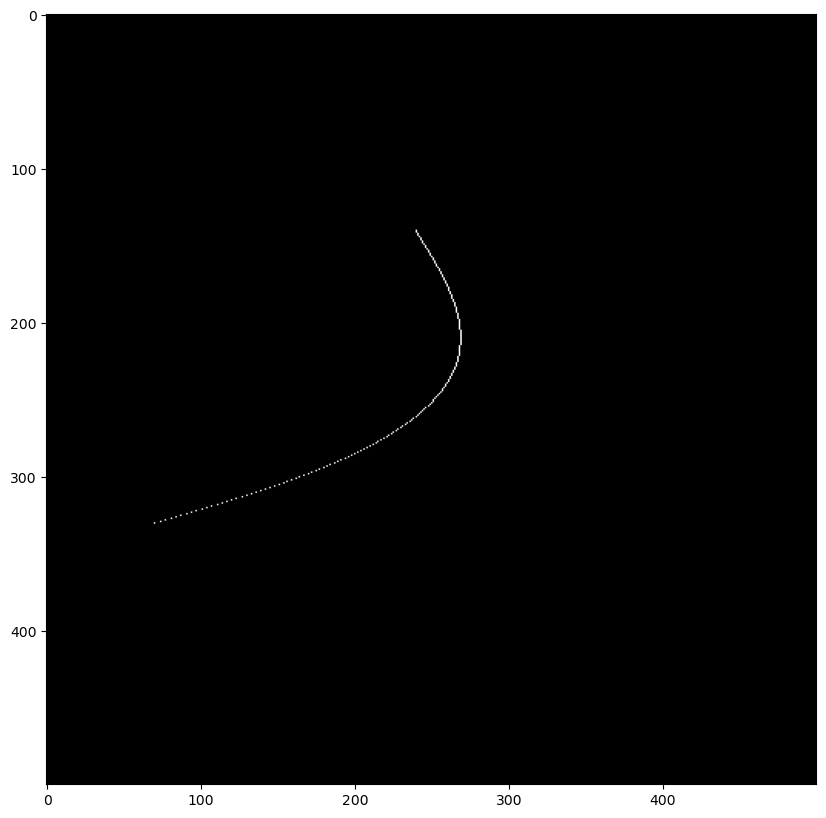

In [5]:
canvas = np.zeros((ROI_size,ROI_size))
for pts in line_pts:
    canvas[pts[0], pts[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [6]:
line_pts_rotated= rotate_2d_points_around_center_of_mass(line_pts)


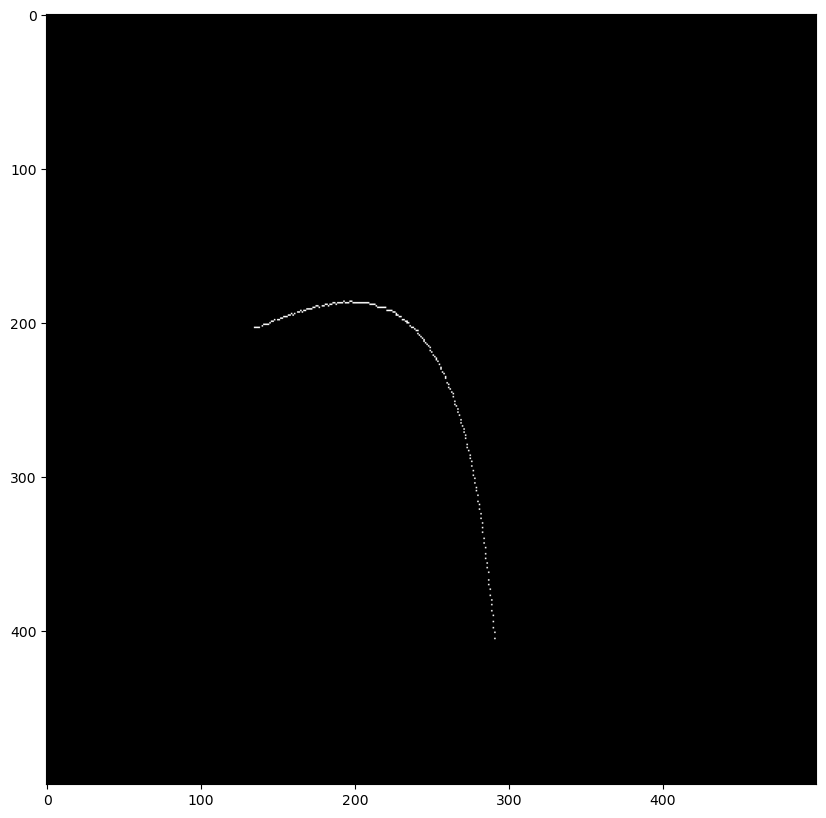

In [7]:
canvas = np.zeros((ROI_size,ROI_size))
for pts in line_pts_rotated:
    canvas[pts[0], pts[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [8]:
curve_indices =[]
for i in range(line_pts.shape[0]-1):
    x0, y0 = line_pts[i,0], line_pts[i,1]
    x1, y1 = line_pts[i+1,0], line_pts[i+1,1]
    line_x, line_y = line(x0, y0, x1, y1)
    line_points =  np.array([line_x, line_y]).transpose()
    curve_indices.append(line_points)
    
curve_indices = np.concatenate(curve_indices, axis=0)

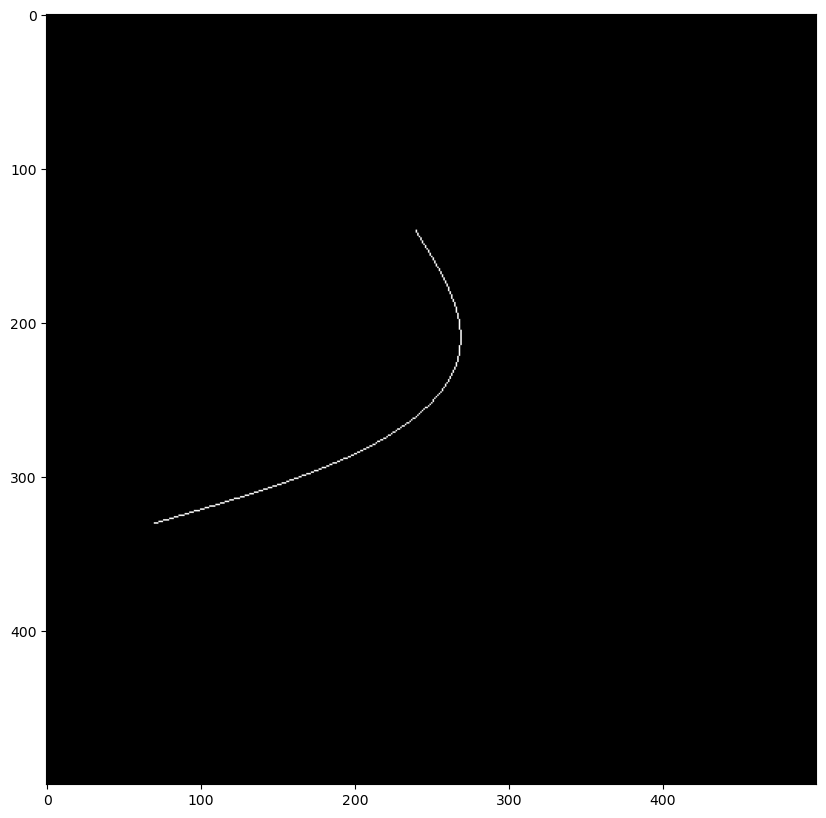

In [9]:
canvas = np.zeros((ROI_size,ROI_size))
for pts in curve_indices:
    canvas[pts[0], pts[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [10]:
curve_indices =[]
for i in range(line_pts.shape[0]-1):
    x0, y0 = line_pts[i,0], line_pts[i,1]
    x1, y1 = line_pts[i+1,0], line_pts[i+1,1]
    line_x, line_y = line(x0, y0, x1, y1)
    line_points =  np.array([line_x, line_y]).transpose()
    curve_indices.append(line_points)
    
curve_indices = np.concatenate(curve_indices, axis=0)

In [11]:
import numpy as np

# Example array (shape: (n, m))
arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
print (arr.shape)
# Define a condition (e.g., select rows where the first element is greater than 5)
condition = arr[:, 0] > 5

# Use boolean indexing to select the rows that meet the condition
filtered_arr = arr[condition]

print("Original array:")
print(arr)
print("\nFiltered array:")
print(filtered_arr)

(4, 3)
Original array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Filtered array:
[[ 7  8  9]
 [10 11 12]]


In [12]:
def draw_curve(ROI_size):
    min_len = 200
    line_len_x = np.random.randint(min_len, ROI_size-min_len)
    line_len_y = np.random.randint(min_len, ROI_size-min_len)
    rand_pt = np.random.randint(0, ROI_size-min_len), np.random.randint(0, ROI_size-min_len)
    
    humps = np.random.randint(2, 10)
    xs = np.sort(np.random.choice(np.arange(rand_pt[0],rand_pt[0]+line_len_x), humps, replace=False))
    ys = np.random.choice(np.arange(rand_pt[1],rand_pt[1] + line_len_y), humps, replace=False)
    cubic_interpolation_model = CubicSpline(xs, ys, bc_type = "natural")

    # X_=np.linspace(xs.min(), xs.max(), 1*(xs.max()-xs.min())).astype(int)
    X_ = np.linspace(xs.min(), xs.max(), ROI_size).astype(int)
    Y_ = cubic_interpolation_model(X_).astype(int)

    X_ = np.clip(X_,0,ROI_size-1)
    Y_ = np.clip(Y_,0,ROI_size-1)
    line_pts = np.array([X_, Y_]).transpose()
    line_pts = rotate_2d_points_around_center_of_mass(line_pts)
    curve_indices =[]
    for i in range(line_pts.shape[0]-1):
        x0, y0 = line_pts[i,0], line_pts[i,1]
        x1, y1 = line_pts[i+1,0], line_pts[i+1,1]
        line_points = np.array(line(x0, y0, x1, y1)).transpose()
        curve_indices.append(line_points)
    curve_indices = np.concatenate(curve_indices, axis=0)

    return line_pts

# test_xs = np.sort(np.random.randint(1, 200, 10))
# test_ys = np.random.randint(1, 200, 10)
# cubic_interpolation_model = CubicSpline(test_xs, test_ys, bc_type = "natural")


In [13]:
curve_indices = draw_curve(ROI_size)

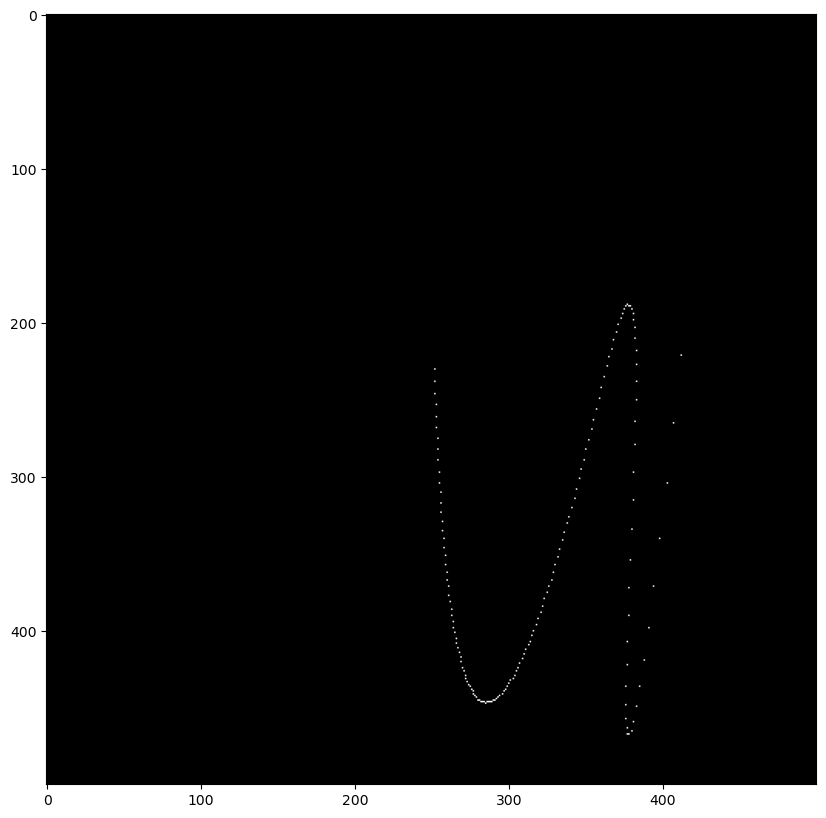

In [14]:
canvas = np.zeros((ROI_size,ROI_size))
for pts in curve_indices:
    canvas[pts[0], pts[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

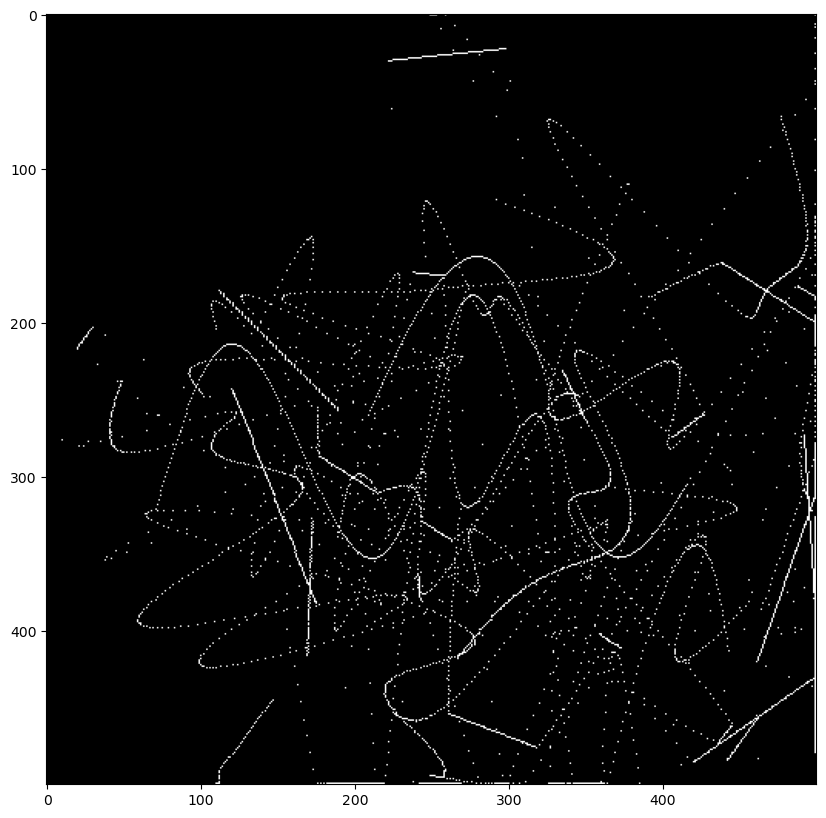

In [15]:
curve_indices_list = []

for i in range(30):
    new_curve = draw_curve(ROI_size)
    curve_indices_list.append(new_curve)

canvas = np.zeros((ROI_size,ROI_size))
for curve_indices_ in curve_indices_list:
    for pts in curve_indices_:
        canvas[pts[0], pts[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')


In [16]:
def draw_curve(ROI_size):

    humps = np.random.randint(3, 7)
    xs = np.sort(np.random.choice(np.arange(1,ROI_size), humps, replace=False))
    ys = np.random.choice(np.arange(1,ROI_size), humps, replace=False)
    cubic_interpolation_model = CubicSpline(xs, ys, bc_type = "natural")

    # X_=np.linspace(xs.min(), xs.max(), 1*(xs.max()-xs.min())).astype(int)
    X_=np.linspace(xs.min(), xs.max(), ROI_size).astype(int)
    Y_=cubic_interpolation_model(X_).astype(int)

    X_ = np.clip(X_,0,ROI_size-1)
    Y_ = np.clip(Y_,0,ROI_size-1)
    line_pts = np.array([Y_, X_]).transpose()

    curve_indices =[]
    for i in range(line_pts.shape[0]-1):
        x0, y0 = line_pts[i,0], line_pts[i,1]
        x1, y1 = line_pts[i+1,0], line_pts[i+1,1]
        line_points = np.array(line(x0, y0, x1, y1)).transpose()
        curve_indices.append(line_points)
        
    curve_indices = np.concatenate(curve_indices, axis=0)
    return curve_indices
    
# test_xs = np.sort(np.random.randint(1, 200, 10))
# test_ys = np.random.randint(1, 200, 10)
# cubic_interpolation_model = CubicSpline(test_xs, test_ys, bc_type = "natural")


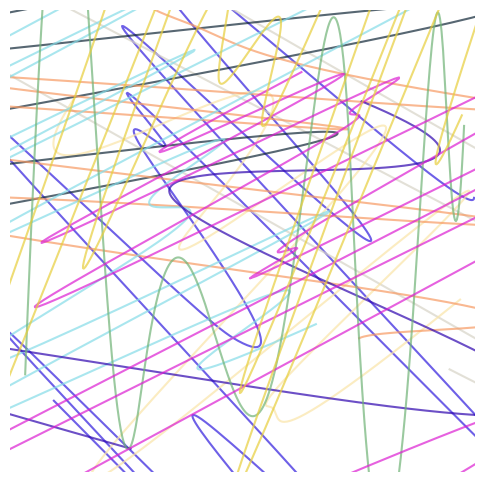

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import random

def rotate_around_center_of_mass(x, y):
    """
    Rotates points (x, y) around their center of mass by a random angle.
    
    Parameters:
    x (np.ndarray): x-coordinates of the points.
    y (np.ndarray): y-coordinates of the points.
    
    Returns:
    tuple: Rotated x and y coordinates.
    """
    # Calculate the center of mass
    center_of_mass_x = x.mean()
    center_of_mass_y = y.mean()
    
    # Translate points so the center of mass is at the origin
    translated_x = x - center_of_mass_x
    translated_y = y - center_of_mass_y
    
    # Generate a random rotation angle between 0 and 2*pi
    angle = random.uniform(0, 2 * np.pi)
    
    # Create the rotation matrix
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])
    
    # Rotate the translated points
    rotated_points = np.dot(rotation_matrix, np.vstack((translated_x, translated_y)))
    
    # Translate the points back to their original center of mass
    rotated_x = rotated_points[0, :] + center_of_mass_x
    rotated_y = rotated_points[1, :] + center_of_mass_y
    
    return rotated_x, rotated_y

def draw_random_rotated_smooth_curves(num_curves=10, img_size=500):
    """
    Draws smooth random curves with a random number of humps within a given pixel space,
    then rotates each curve around its center of mass by a random angle.
    
    Parameters:
    num_curves (int): Number of curves to draw.
    img_size (int): The size of the pixel space (both width and height).
    """
    # Create a figure and set the size
    plt.figure(figsize=(6, 6))
    plt.xlim(0, img_size)
    plt.ylim(0, img_size)
    
    # Draw each curve
    for _ in range(num_curves):
        # Randomly choose the number of humps (between 3 and 10 for better curves)
        num_humps = np.random.randint(3, 11)
        
        # Generate random x-values and sort them to create a continuous curve
        x = np.sort(np.random.uniform(0, img_size, num_humps * 2))
        
        # Generate y-values with random humps
        y = np.random.uniform(0, img_size, num_humps * 2)
        
        # Create a smooth curve using spline interpolation
        x_smooth = np.linspace(x.min(), x.max(), 500)
        spline = make_interp_spline(x, y, k=3)  # k=3 means cubic spline for smoothness
        y_smooth = spline(x_smooth)
        
        # Rotate the curve around its center of mass
        rotated_x, rotated_y = rotate_around_center_of_mass(x_smooth, y_smooth)
        
        # Plot the smooth, rotated curve with a random color and some transparency
        plt.plot(rotated_x, rotated_y, color=np.random.rand(3,), alpha=0.7, linewidth=1.5)
    
    # Remove axis for a cleaner look
    plt.axis('off')
    
    # Show the plot
    plt.show()

# Example usage:
draw_random_rotated_smooth_curves()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import random

def rotate_around_center_of_mass(x, y):
    """
    Rotates points (x, y) around their center of mass by a random angle.
    
    Parameters:
    x (np.ndarray): x-coordinates of the points.
    y (np.ndarray): y-coordinates of the points.
    
    Returns:
    tuple: Rotated x and y coordinates.
    """
    # Calculate the center of mass
    center_of_mass_x = x.mean()
    center_of_mass_y = y.mean()
    
    # Translate points so the center of mass is at the origin
    translated_x = x - center_of_mass_x
    translated_y = y - center_of_mass_y
    
    # Generate a random rotation angle between 0 and 2*pi
    angle = random.uniform(0, 2 * np.pi)
    
    # Create the rotation matrix
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])
    
    # Rotate the translated points
    rotated_points = np.dot(rotation_matrix, np.vstack((translated_x, translated_y)))
    
    # Translate the points back to their original center of mass
    rotated_x = rotated_points[0, :] + center_of_mass_x
    rotated_y = rotated_points[1, :] + center_of_mass_y
    
    return rotated_x, rotated_y

def get_curve_pixel_indices(num_curves=50, img_size=500):
    """
    Generates smooth random curves with a random number of humps within a given pixel space,
    rotates each curve around its center of mass by a random angle, and returns the pixel indices
    occupied by each curve.
    
    Parameters:
    num_curves (int): Number of curves to draw.
    img_size (int): The size of the pixel space (both width and height).
    
    Returns:
    list: A list of arrays, where each array contains the (x, y) pixel indices of a curve.
    """
    curves_indices = []
    
    # Generate each curve
    for _ in range(num_curves):
        # Randomly choose the number of humps (between 3 and 10 for better curves)
        num_humps = np.random.randint(3, 11)
        
        # Generate random x-values and sort them to create a continuous curve
        x = np.sort(np.random.uniform(0, img_size, num_humps * 2))
        
        # Generate y-values with random humps
        y = np.random.uniform(0, img_size, num_humps * 2)
        
        # Create a smooth curve using spline interpolation
        x_smooth = np.linspace(x.min(), x.max(), 500)
        spline = make_interp_spline(x, y, k=3)  # k=3 means cubic spline for smoothness
        y_smooth = spline(x_smooth)
        
        # Rotate the curve around its center of mass
        rotated_x, rotated_y = rotate_around_center_of_mass(x_smooth, y_smooth)
        
        # Discretize the coordinates into pixel indices and ensure they stay within the bounds
        pixel_x = np.clip(np.round(rotated_x).astype(int), 0, img_size - 1)
        pixel_y = np.clip(np.round(rotated_y).astype(int), 0, img_size - 1)
        
        # Combine x and y into a single array of (x, y) pixel indices
        curve_indices = np.vstack((pixel_x, pixel_y)).T
        
        # Remove duplicates to avoid redundant pixel positions
        curve_indices = np.unique(curve_indices, axis=0)
        
        # Append the pixel indices of this curve to the list
        curves_indices.append(curve_indices)
        
    return np.concatenate(curves_indices)

# Example usage:
curve_pixel_indices = get_curve_pixel_indices()

# Print the indices of the first curve as an example
print(curve_pixel_indices.shape)

(15912, 2)


In [19]:
curves_indices = []
num_curves=10
img_size=500

# Generate each curve
for _ in range(num_curves):
    # Randomly choose the number of humps (between 3 and 10 for better curves)
    num_humps = np.random.randint(3, 9)
    
    # Generate random x-values and sort them to create a continuous curve
    x = np.sort(np.random.uniform(0, img_size, num_humps * 2))
    
    # Generate y-values with random humps
    y = np.random.uniform(0, img_size, num_humps * 2)
    
    # Create a smooth curve using spline interpolation
    x_smooth = np.linspace(x.min(), x.max(), 500)
    spline = make_interp_spline(x, y, k=3)  # k=3 means cubic spline for smoothness
    y_smooth = spline(x_smooth)
    
    # Rotate the curve around its center of mass
    rotated_x, rotated_y = rotate_around_center_of_mass(x_smooth, y_smooth)
    
    # Discretize the coordinates into pixel indices and ensure they stay within the bounds
    pixel_x = np.clip(np.round(rotated_x).astype(int), 0, img_size - 1)
    pixel_y = np.clip(np.round(rotated_y).astype(int), 0, img_size - 1)
    
    # Combine x and y into a single array of (x, y) pixel indices
    curve_indices = np.vstack((pixel_x, pixel_y)).T
    
    # Remove duplicates to avoid redundant pixel positions
    # curve_indices = np.unique(curve_indices, axis=0)
    
    # Append the pixel indices of this curve to the list
    curves_indices.append(curve_indices)

# curves_indices = np.concatenate(curves_indices)

In [20]:
continuous_curve_list = []
for curve in curves_indices:
    curve_form = []
    for pt_ind in range(len(curve)-1):
        x0, y0 = curve[pt_ind,0], curve[pt_ind,1]
        x1, y1 = curve[pt_ind+1,0], curve[pt_ind+1,1]
        line_x, line_y = line(x0, y0, x1, y1)
        line_points =  np.array([line_x, line_y]).transpose()
        line_points = np.unique(line_points, axis=0)
        curve_form.append(line_points)
    continuous_curve = np.concatenate(curve_form, axis=0)
    continuous_curve_list.append(continuous_curve)

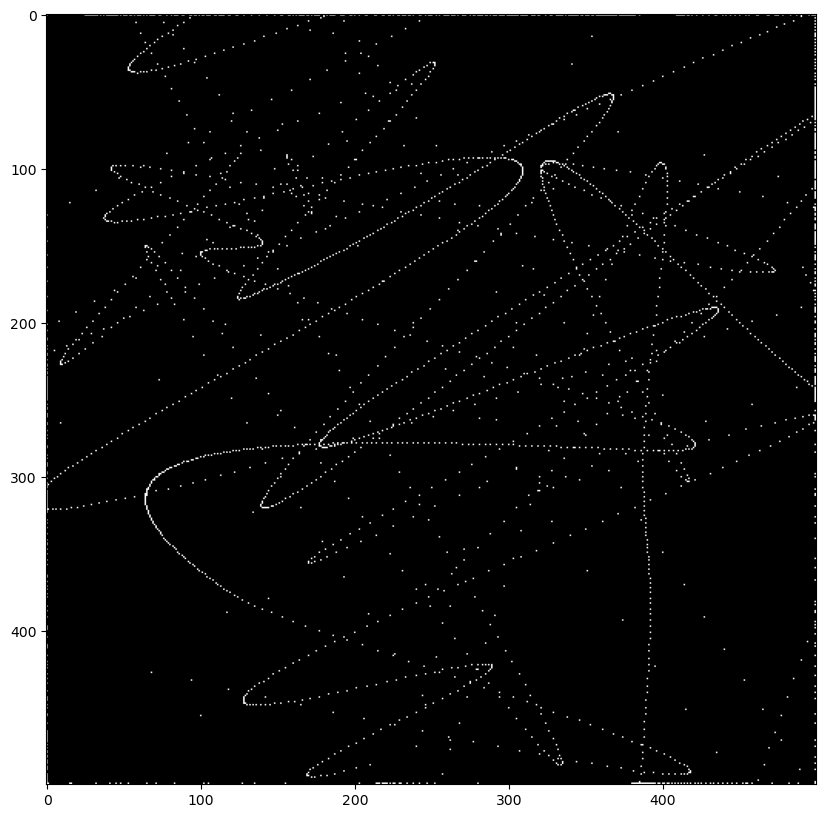

In [21]:
canvas = np.zeros((ROI_size,ROI_size))
for curve in curves_indices:
    for curve_points in curve:
        canvas[curve_points[0], curve_points[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

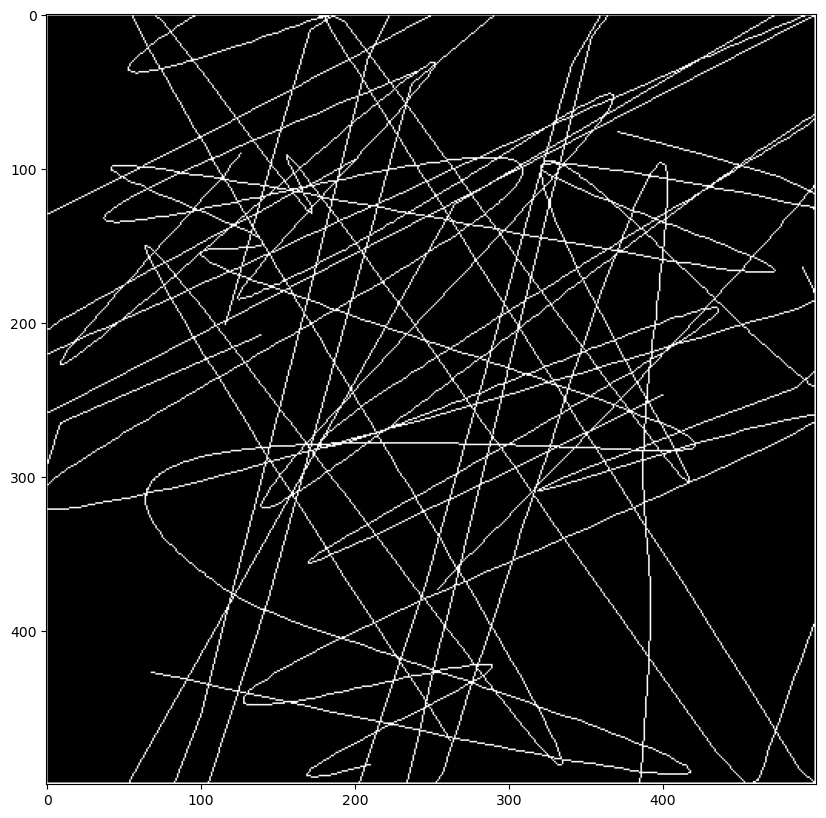

In [46]:
canvas = np.zeros((ROI_size,ROI_size))
for curve in continuous_curve_list:
    for curve_points in curve:
        canvas[curve_points[0], curve_points[1]] = 100
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

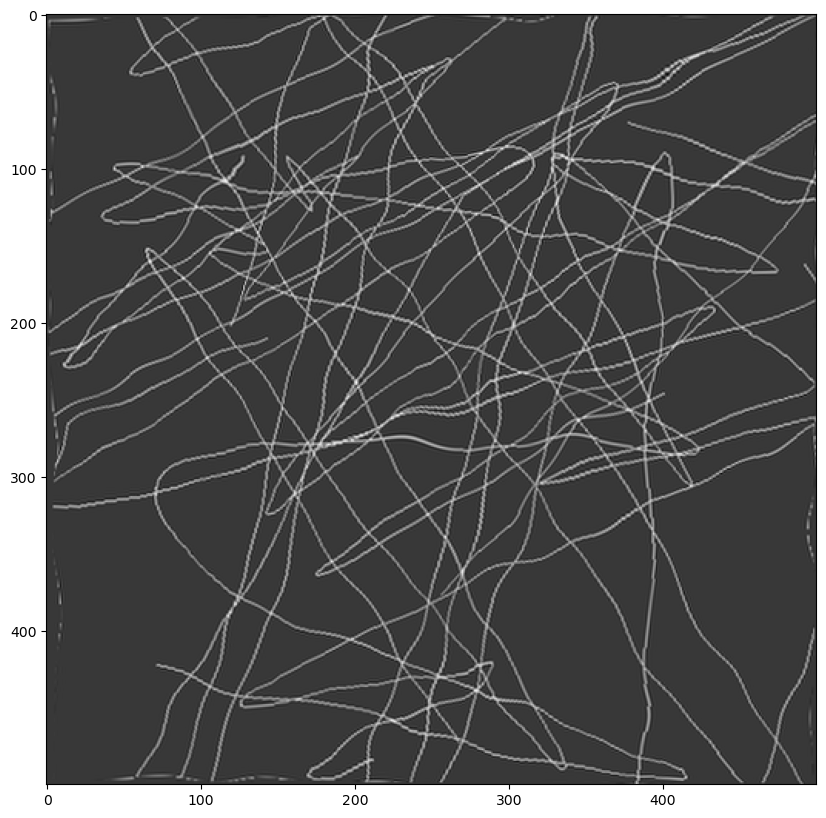

In [53]:
canvas = elasticdeform.deform_random_grid(canvas, sigma=0.5, points=3)
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [43]:
import numpy as np
from scipy.interpolate import make_interp_spline
import random

def rotate_around_center_of_mass_3d(x, y, z):
    """
    Rotates 3D points (x, y, z) around their center of mass by random angles.
    
    Parameters:
    x (np.ndarray): x-coordinates of the points.
    y (np.ndarray): y-coordinates of the points.
    z (np.ndarray): z-coordinates of the points.
    
    Returns:
    tuple: Rotated x, y, and z coordinates.
    """
    # Calculate the center of mass
    center_of_mass_x = x.mean()
    center_of_mass_y = y.mean()
    center_of_mass_z = z.mean()
    
    # Translate points so the center of mass is at the origin
    translated_x = x - center_of_mass_x
    translated_y = y - center_of_mass_y
    translated_z = z - center_of_mass_z
    
    # Generate random rotation angles between 0 and 2*pi for each axis
    angle_x = random.uniform(0, 2 * np.pi)
    angle_y = random.uniform(0, 2 * np.pi)
    angle_z = random.uniform(0, 2 * np.pi)
    
    # Create rotation matrices for each axis
    cos_x, sin_x = np.cos(angle_x), np.sin(angle_x)
    cos_y, sin_y = np.cos(angle_y), np.sin(angle_y)
    cos_z, sin_z = np.cos(angle_z), np.sin(angle_z)
    
    # Rotation matrix for X-axis
    rotation_matrix_x = np.array([
        [1, 0, 0],
        [0, cos_x, -sin_x],
        [0, sin_x, cos_x]
    ])
    
    # Rotation matrix for Y-axis
    rotation_matrix_y = np.array([
        [cos_y, 0, sin_y],
        [0, 1, 0],
        [-sin_y, 0, cos_y]
    ])
    
    # Rotation matrix for Z-axis
    rotation_matrix_z = np.array([
        [cos_z, -sin_z, 0],
        [sin_z, cos_z, 0],
        [0, 0, 1]
    ])
    
    # Combine the rotations into a single matrix
    rotation_matrix = rotation_matrix_z @ rotation_matrix_y @ rotation_matrix_x
    
    # Rotate the translated points using the combined rotation matrix
    rotated_points = np.dot(rotation_matrix, np.vstack((translated_x, translated_y, translated_z)))
    
    # Translate the points back to their original center of mass
    rotated_x = rotated_points[0, :] + center_of_mass_x
    rotated_y = rotated_points[1, :] + center_of_mass_y
    rotated_z = rotated_points[2, :] + center_of_mass_z
    
    return rotated_x, rotated_y, rotated_z

def get_3d_path_voxel_indices(num_paths=15, voxel_size=500):
    """
    Generates smooth random 3D paths with a random number of humps within a voxel space,
    rotates each path around its center of mass by random angles, and returns the voxel indices
    occupied by each path.
    
    Parameters:
    num_paths (int): Number of paths to generate.
    voxel_size (int): The size of the voxel space (width, height, and depth).
    
    Returns:
    list: A list of arrays, where each array contains the (x, y, z) voxel indices of a path.
    """
    paths_indices = []
    
    # Generate each path
    for _ in range(num_paths):
        # Randomly choose the number of humps (between 3 and 10 for better paths)
        num_humps = np.random.randint(3, 11)
        
        # Generate random x, y, and z-values and sort them for smooth curves
        t = np.sort(np.random.uniform(0, 1, num_humps * 2))
        x = np.random.uniform(0, voxel_size, num_humps * 2)
        y = np.random.uniform(0, voxel_size, num_humps * 2)
        z = np.random.uniform(0, voxel_size, num_humps * 2)
        
        # Create smooth paths using spline interpolation
        t_smooth = np.linspace(t.min(), t.max(), 5000)
        spline_x = make_interp_spline(t, x, k=3)
        spline_y = make_interp_spline(t, y, k=3)
        spline_z = make_interp_spline(t, z, k=3)
        x_smooth = spline_x(t_smooth)
        y_smooth = spline_y(t_smooth)
        z_smooth = spline_z(t_smooth)
        
        # Rotate the path around its center of mass
        rotated_x, rotated_y, rotated_z = rotate_around_center_of_mass_3d(x_smooth, y_smooth, z_smooth)
        
        # Discretize the coordinates into voxel indices and ensure they stay within the bounds
        voxel_x = np.clip(np.round(rotated_x).astype(int), 0, voxel_size - 1)
        voxel_y = np.clip(np.round(rotated_y).astype(int), 0, voxel_size - 1)
        voxel_z = np.clip(np.round(rotated_z).astype(int), 0, voxel_size - 1)
        
        # Combine x, y, and z into a single array of (x, y, z) voxel indices
        path_indices = np.vstack((voxel_x, voxel_y, voxel_z)).T
        
        # Remove duplicates to avoid redundant voxel positions
        # path_indices = np.unique(path_indices, axis=0)
        curve_form = []
        for pt_ind in range(len(path_indices)-1):
            x0, y0, z0 = path_indices[pt_ind,0], path_indices[pt_ind,1], path_indices[pt_ind,2]
            x1, y1, z1 = path_indices[pt_ind+1,0], path_indices[pt_ind+1,1], path_indices[pt_ind+1,2]
            line_x, line_y, line_z = line_nd([x0, y0, z0], [x1, y1, z1])
            line_points =  np.array([line_x, line_y, line_z]).transpose()
            line_points = np.unique(line_points, axis=0)
            curve_form.append(line_points)
        continuous_curve = np.concatenate(curve_form, axis=0)
        # Append the voxel indices of this path to the list
        paths_indices.append(continuous_curve)
    
    return paths_indices

# Example usage:
path_voxel_indices = get_3d_path_voxel_indices()

# Print the indices of the first path as an example
print("Voxel indices of the first path:")
print(path_voxel_indices[0])

Voxel indices of the first path:
[[  0 498   0]
 [  0 499   0]
 [  0 333   0]
 ...
 [  0 496   0]
 [  0 497   0]
 [  0 498   0]]


In [39]:
voxel_size = 500

num_humps = np.random.randint(3, 11)

# Generate random x, y, and z-values and sort them for smooth curves
t = np.sort(np.random.uniform(0, 1, num_humps * 2))
x = np.random.uniform(0, voxel_size, num_humps * 2)
y = np.random.uniform(0, voxel_size, num_humps * 2)
z = np.random.uniform(0, voxel_size, num_humps * 2)

# Create smooth paths using spline interpolation
t_smooth = np.linspace(t.min(), t.max(), 500*500)
spline_x = make_interp_spline(t, x, k=3)
spline_y = make_interp_spline(t, y, k=3)
spline_z = make_interp_spline(t, z, k=3)
x_smooth = spline_x(t_smooth)
y_smooth = spline_y(t_smooth)
z_smooth = spline_z(t_smooth)

# Rotate the path around its center of mass
rotated_x, rotated_y, rotated_z = rotate_around_center_of_mass_3d(x_smooth, y_smooth, z_smooth)

# Discretize the coordinates into voxel indices and ensure they stay within the bounds
voxel_x = np.clip(np.round(rotated_x).astype(int), 0, voxel_size - 1)
voxel_y = np.clip(np.round(rotated_y).astype(int), 0, voxel_size - 1)
voxel_z = np.clip(np.round(rotated_z).astype(int), 0, voxel_size - 1)

# Combine x, y, and z into a single array of (x, y, z) voxel indices
path_indices = np.vstack((voxel_x, voxel_y, voxel_z)).T
print (path_indices.shape)

# Remove duplicates to avoid redundant voxel positions
# path_indices = np.unique(path_indices, axis=0)
curve_form = []
for pt_ind in range(len(path_indices)-1):
    x0, y0, z0 = path_indices[pt_ind,0], path_indices[pt_ind,1], path_indices[pt_ind,2]
    x1, y1, z1 = path_indices[pt_ind+1,0], path_indices[pt_ind+1,1], path_indices[pt_ind+1,2]
    line_x, line_y, line_z = line_nd([x0, y0, z0], [x1, y1, z1])
    line_points =  np.array([line_x, line_y, line_z]).transpose()
    line_points = np.unique(line_points, axis=0)
    curve_form.append(line_points)
continuous_curve = np.concatenate(curve_form, axis=0)
# Append the voxel indices of this path to the list


(500, 3)


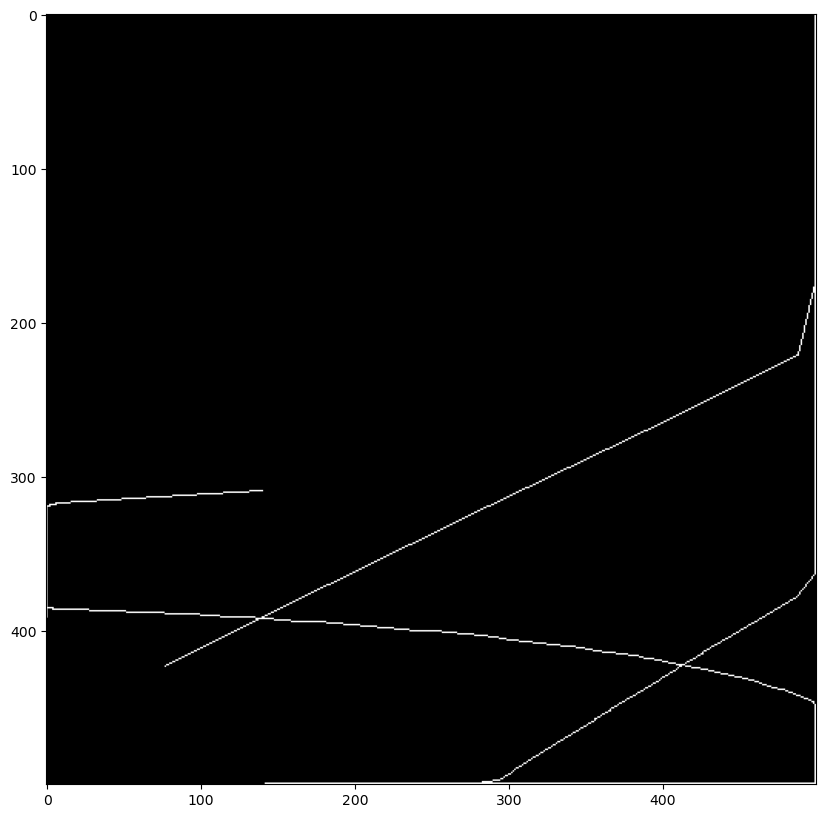

In [42]:
canvas_vol = np.zeros((ROI_size,ROI_size,ROI_size))
for pt in continuous_curve:
    canvas_vol[pt[0], pt[1], pt[2]] = 100

canvas = np.amax(canvas_vol, axis=1)
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

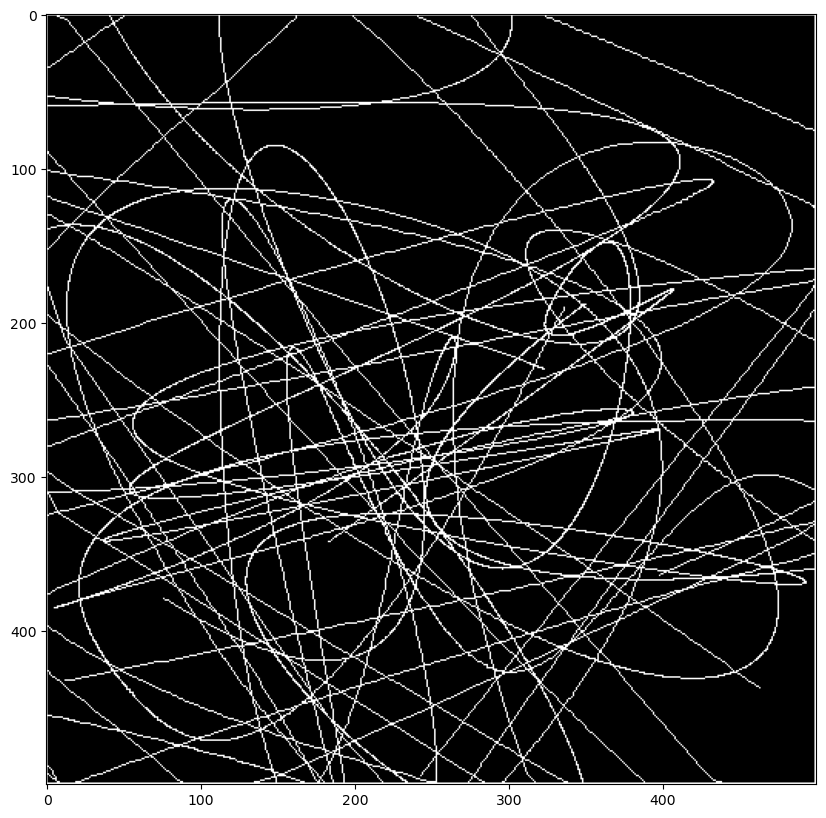

In [45]:
canvas_vol = np.zeros((ROI_size,ROI_size,ROI_size))
for path in path_voxel_indices:
    for pt in path:
        canvas_vol[pt[0], pt[1], pt[2]] = 100

canvas = np.amax(canvas_vol, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [60]:
sigma_=0.7 #deformation parameter
points_= 25 #deformation parameter
canvas_vol_deform = elasticdeform.deform_random_grid(canvas_vol, sigma=sigma_, points=points_)

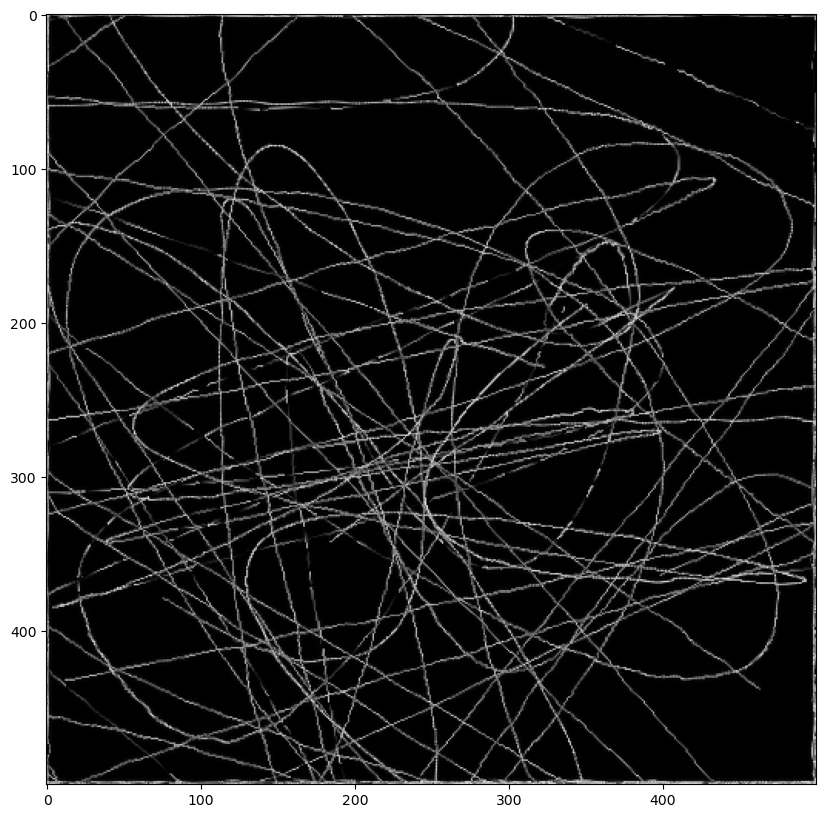

In [64]:
canvas = np.amax(canvas_vol_deform, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')